In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
import random

In [2]:
ExE = pd.read_csv('../../../extracted_data/ExE_imputed_5.csv', sep = ',', index_col = 0)

embeddings = pd.read_csv('../../../extracted_data/yeast_emb_embeddings_yeastnet_genex.csv', sep = ',', index_col = 0)
embeddings = embeddings.reset_index().set_index('gene_id')

R2:  -1.3019670958727212
RMSE: 0.06999018931563179


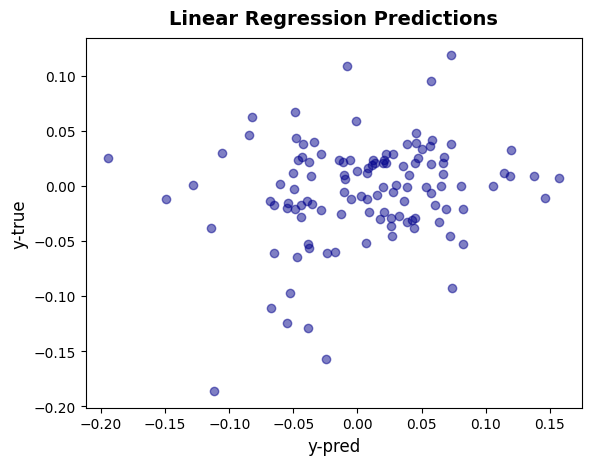

In [3]:
random.seed(36)

target_column = random.choice(ExE.columns)  # Randomly pick a column

# Align embeddings with interaction row
df = embeddings.merge(ExE[[target_column]], left_index=True, right_index=True, how='inner')
X = df.drop(columns=[target_column])
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lm = LinearRegression().fit(X_train, y_train)
y_pred = lm.predict(X_test)

print('R2: ', lm.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(y_pred, y_test, alpha=0.5, c='darkblue')
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("Linear Regression Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()


try the same after Running PCA?

0.9999986316674744


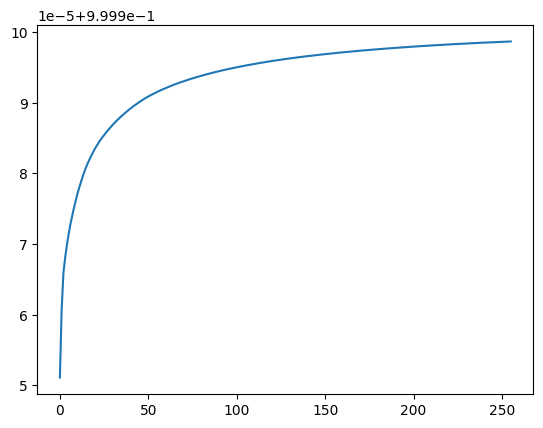

In [4]:
# Check what is the percentage of the variance explained by compressed data compared to the full data 
N=256
pca = PCA(n_components=N)
pca.fit_transform(X)
ev = pca.explained_variance_ratio_.cumsum()
print(ev[-1])
plt.plot(range(0, N), ev)

In [5]:
dims = 256
ExE_PCA = pd.DataFrame(PCA(n_components=dims).fit_transform(X))
ExE_PCA

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,-3188.586549,-7.920600,0.434203,2.470023,-2.481767,-2.811428,2.435653,0.227911,2.406019,-3.188318,...,-0.023045,0.212598,-0.002878,0.121669,0.280132,0.050840,0.210990,0.117609,0.145711,-0.039623
1,-3185.584552,12.499045,0.806523,-5.286056,0.522722,1.339732,0.530180,-0.748855,0.902989,-0.626194,...,-0.031093,-0.212143,-0.232467,0.078095,-0.132565,-0.465057,0.076439,-0.261886,-0.463172,-0.097654
2,-3184.587300,-3.704424,-3.842068,1.941961,0.732861,-0.776257,3.309454,2.605775,-0.960326,2.084399,...,-0.184618,0.213747,-0.060091,0.042756,0.187863,-0.205219,-0.032265,0.053443,-0.150764,-0.003146
3,-3147.587805,-6.776827,-2.401889,0.048460,-0.434256,3.476109,0.867607,0.321085,-0.284185,-0.780553,...,-0.065398,0.159565,0.075396,0.208688,-0.297876,-0.032262,0.206683,-0.053256,-0.119131,-0.100277
4,-3119.587364,-6.370593,-1.610579,-2.991152,1.557464,-0.089695,1.861919,2.038548,-3.297091,0.388886,...,0.036436,-0.107301,-0.066422,0.080360,-0.047844,0.054407,-0.169136,0.046813,0.204845,-0.161232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,3292.416181,9.545110,0.639532,-0.170065,2.026058,-0.187121,1.105730,-1.134525,3.025670,-0.726756,...,-0.031702,-0.080360,-0.397464,0.114087,0.276358,0.247951,0.196727,-0.323096,-0.231742,0.230602
580,3324.412065,-6.703896,-4.426387,1.993891,0.409833,2.105512,1.093884,-3.170439,0.034179,0.535166,...,-0.090372,-0.009691,-0.126979,0.145786,0.216394,0.159322,-0.083803,0.043471,0.042896,-0.086458
581,3334.412979,-5.154754,-3.040283,2.437122,-1.943498,1.366678,0.586438,0.976014,1.238943,0.669984,...,0.022866,0.013017,-0.034375,0.021652,0.111828,-0.330581,-0.329227,-0.040196,-0.055621,-0.047644
582,3351.413512,-2.497050,-0.691434,1.266195,3.451294,3.849530,0.866215,1.553072,-0.076064,-1.294039,...,0.235674,0.180768,0.003861,0.116057,0.130570,0.140518,0.009186,-0.032846,0.185736,0.232387


R2:  -1.3428410158286646
RMSE: 0.07060883105790529


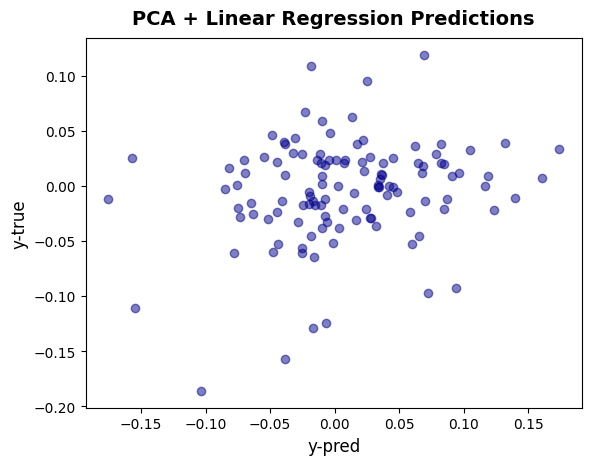

In [6]:
X_train, X_test, y_train, y_test = train_test_split(ExE_PCA, y, test_size=0.2, random_state=42)

lm = LinearRegression().fit(X_train, y_train)
y_pred = lm.predict(X_test)


print('R2: ', lm.score(X_test, y_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


plt.scatter(y_pred, y_test, alpha=0.5, c='darkblue')
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("PCA + Linear Regression Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()

## Try other models

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.383e-02, tolerance: 1.313e-04
  model = cd_fast.enet_coordinate_descent(


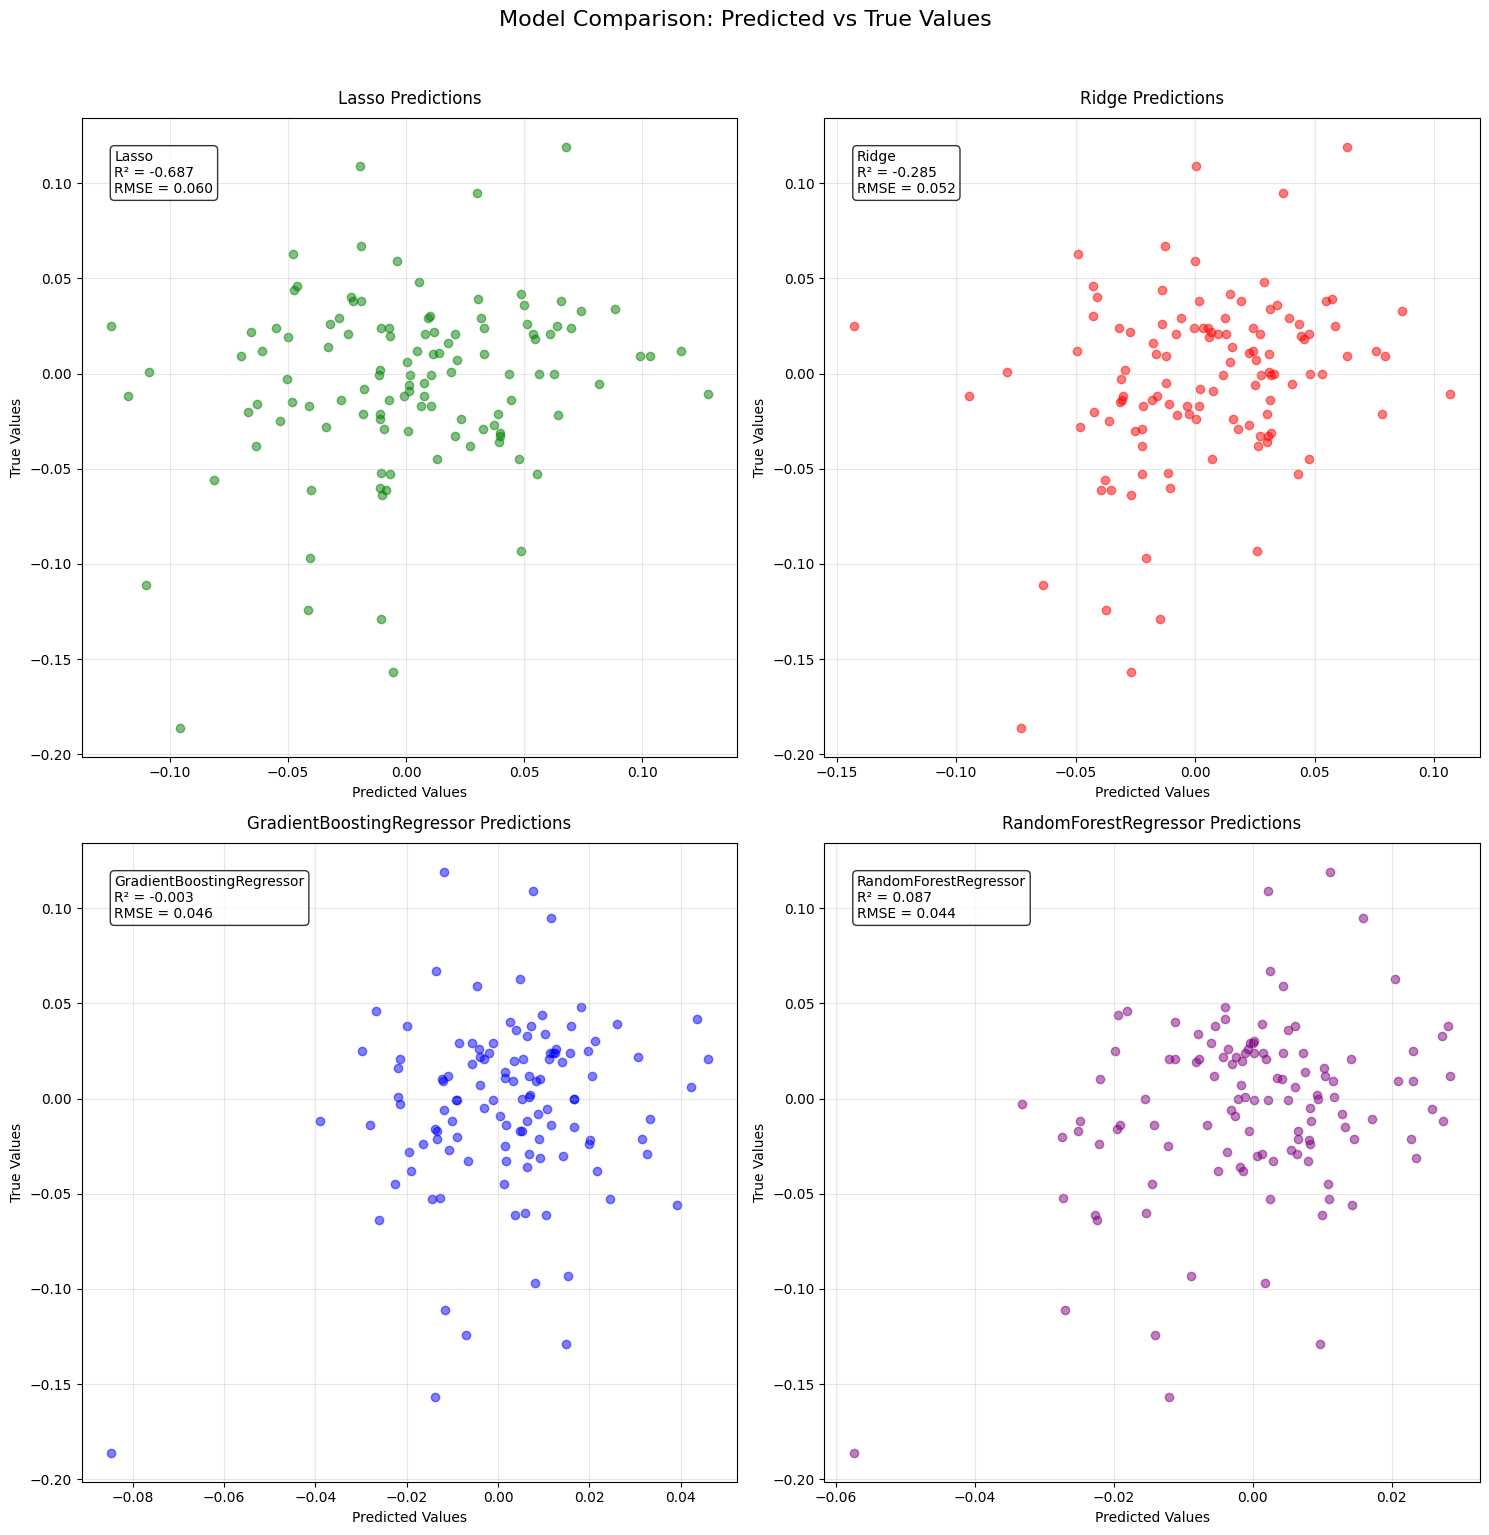

In [7]:
predictive_models = [  
                      Lasso(alpha=0.0001),
                      Ridge(alpha=10.0),
                      GradientBoostingRegressor(n_estimators=20, learning_rate=0.2, max_depth=3, random_state=48),
                      RandomForestRegressor(n_estimators=20, random_state=42)
]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Model Comparison: Predicted vs True Values', fontsize=16, y=1.02)

axes = axes.ravel()

colors = ['green', 'red', 'blue', 'purple']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for idx, (model, ax, color) in enumerate(zip(predictive_models, axes, colors)):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    ax.scatter(y_pred, y_test, alpha=0.5, color=color)
        
    model_name = model.__class__.__name__
    ax.text(0.05, 0.95, 
            f'{model_name}\nR² = {r2:.3f}\nRMSE = {rmse:.3f}',
            transform=ax.transAxes,
            verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('True Values')
    ax.set_title(f'{model_name} Predictions', pad=10)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 189.3486 - mse: 189.3486 - val_loss: 40.8937 - val_mse: 40.8937
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 17.2046 - mse: 17.2046 - val_loss: 1.5688 - val_mse: 1.5688
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6313 - mse: 0.6313 - val_loss: 0.1312 - val_mse: 0.1312
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1231 - mse: 0.1231 - val_loss: 0.0405 - val_mse: 0.0405
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0526 - mse: 0.0526 - val_loss: 0.0527 - val_mse: 0.0527
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0384 - mse: 0.0384 - val_loss: 0.0130 - val_mse: 0.0130
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0223 - mse: 0.0223 - val_loss: 0.0078 - val_mse: 0.0078
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0135 - val_mse: 0.0135
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.015

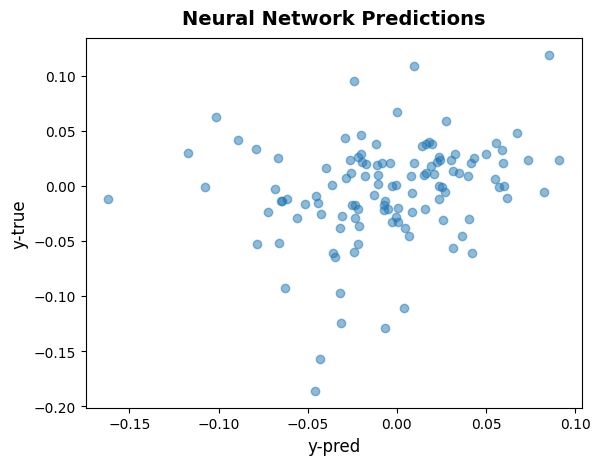

In [8]:
# And Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mse'])

model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

loss, mae = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
print('R2:', r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

plt.scatter(y_pred, y_test, alpha=0.5)
plt.xlabel("y-pred", fontsize=12)
plt.ylabel("y-true", fontsize=12)
plt.title("Neural Network Predictions", fontweight='bold', fontsize=14, pad=10)
plt.show()